<a href="https://colab.research.google.com/github/a01110946/a01110946/blob/main/Copia_de_Reto_Entrega1_Limpieza_an%C3%A1lisis_visualizaci%C3%B3n_kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial Aplicada
## Ciencia y analítica de datos
## Reto - Entrega 1 | Limpieza, análisis, visualización y K-means
#### Tecnológico de Monterrey
#### Prof. María De La Paz Rico

#### Tutor: Roberto Antonio Guevara González

#### Alumnos:
- #### Eunice Ornelas Rodríguez | A01794299
- #### Fernando Maytorena Espinosa de los Monteros | A01110946

#### Miércoles 16 de noviembre de 2022

---

Limpieza, análisis, visualización y agrupamiento.
En esta base de datos encontraras:

Aguas subterraneas.
Aguas superficiales.
Elige una base de datos, ya sea la de aguas superficiales o la de aguas subterraneas.

Limpieza de base de datos.
 Explorar  cada datos (auxiliate de describe(), mean(), plot, boxplot de pandas):
Identificando tendencias centrales promedio, media y mediana de los datos. 
Identificar medidas de dispersión, máximo, mínimo .
Identificar medidas de posición no centrales , los cuartiles , outliers.   
Identificar correlaciones.
Preparar los datos 
Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K- means.
Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.

### **Librerías**

In [ ]:
#Librerías 
!pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes keplergl ipywidgets jupyterlab jupyterlab_widgets widgetsnbextension nbviewer nbconvert
!pip install --upgrade jupyterthemes
!jupyter nbextension install --py keplergl
!jupyter nbextension enable --py keplergl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 31.5 MB/s 
     |████████████████████████████████| 1.2 MB 47.1 MB/s 
     |████████████████████████████████| 233 kB 64.8 MB/s 
     |████████████████████████████████| 385 kB 70.1 MB/s 
     |████████████████████████████████| 742 kB 38.6 MB/s 
     |████████████████████████████████| 59 kB 8.8 MB/s 
  Using cached urllib3-1.26.12-py2.py3-none-any.whl (140 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Created wheel for pycurl: filename=pycurl-7.45.1-cp37-cp37m-linux_x86_64.whl size=300969 sha256=5f8309ce4358b6db6773dccea6fb765a7af0ecf62f14b9a2a0cce607a9bc0007
  Stored in directory: /root/.cache/pip/wheels/b4/fe/1f/e6cae4153dbc082271bd5763ad36ae255639e4641054db10bc
Successfully built pycurl
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Installing /usr/local/lib/python3.7/dist-packages/keplergl/static -> keplergl-jupyter
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/extension.js.map
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/keplergl.html
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/main.js
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/extension.js
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/index.js
Up to date: /usr/local/share/jupyter/nbextensions/keplergl-jupyter/index.js.map
- Validating: OK

    To initialize this nbextension in the browser every time the notebook (or other app) loads:
    
          jupyter nbextension enable keplergl --py
    
Enabling notebook extension keplergl-jupyter/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for confi

In [ ]:
# Importamos las librerías y módulos necesarios

import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os
import math 
import matplotlib.pyplot as plt
import requests, zipfile
from io import BytesIO

from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from google.colab import drive

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.preprocessing import QuantileTransformer 
from sklearn.preprocessing import power_transform 
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         
from sklearn.metrics import classification_report, make_scorer
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold
import geopandas as gpd
from shapely.geometry import Point
from keplergl import KeplerGl
from google.colab import output
output.enable_custom_widget_manager()

### **Base de datos**

In [ ]:
path = 'https://raw.githubusercontent.com/PosgradoMNA/actividades-del-projecto-equipo-51/main/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(path, encoding='latin-1')
print('Se importó exitosamente la base de datos: "', os.path.basename(path),'", con', df.shape[0], 'filas, y', df.shape[1], 'columnas.')

Se importó exitosamente la base de datos: " Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv ", con 1068 filas, y 57 columnas.


El primer paso es hacer una revisión rápida de la base de datos para conocer con qué estamos trabajando.

In [ ]:
df.head()

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI


Después, revisamos las principales estadísticas de la base de datos determinar si debemos aplicar alguna técnica de limpieza, y en casi de determinar que sí, definir cuáles técnicas y en qué variables.

In [ ]:
df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


👆 Comenzamos con ```.describe()``` para revisar la distribución numérica de la base de datos, observamos...

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

👆 ```.info()``` nos enlista todas las variables, y nos muestra la cantidad de valores faltantes, y el tipo de dato que contiene cada columna. Rápidamente podemos observar que la columna ```SDT_mg/L``` está completamente vacía, y la columna ```CONTAMINTANTES``` tiene más del 40% de valores faltantes. Por lo tanto, continuaremos con ```.isnull().sum()``` para ver de forma absoluta el número de valores faltantes en cada variable, para continuar con el proceso de limpieza.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

SDT_mg/L                1068
CONTAMINANTES            434
CALIDAD_CONDUC             6
CONDUCT_mS/cm              6
ALC_mg/L                   4
CALIDAD_ALC                4
CALIDAD_SDT_ra             2
SDT_M_mg/L                 2
CALIDAD_SDT_salin          2
CALIDAD_N_NO3              1
CALIDAD_DUR                1
N_NO3_mg/L                 1
DUR_mg/L                   1
CUMPLE_CON_COND            0
CUMPLE_CON_ALC             0
SEMAFORO                   0
CALIDAD_FE                 0
FE_TOT_mg/L                0
CALIDAD_MN                 0
CUMPLE_CON_SDT_ra          0
CUMPLE_CON_SDT_salin       0
CLAVE                      0
CUMPLE_CON_FLUO            0
CUMPLE_CON_DUR             0
CALIDAD_PB                 0
CUMPLE_CON_CF              0
CUMPLE_CON_NO3             0
CUMPLE_CON_AS              0
CUMPLE_CON_CD              0
CUMPLE_CON_CR              0
CUMPLE_CON_HG              0
CUMPLE_CON_PB              0
CUMPLE_CON_MN              0
MN_TOT_mg/L                0
CD_TOT_mg/L   

### **Limpieza**

En la etapa de Base de Datos, observamos que nuestras variables tienen datos numéricos *(float64 e int64)*, y datos no numéricos *(object=string)*; para facilitar la limpieza, vamos a separar las variables por tipos de datos. Asimismo, aprovechamos este paso para separar nuestra variable dependiente.<br><br>
La columna ```SDT_mg/L``` está completamente vacía, por lo que no aporta información al análisis, por lo tanto, la eliminamos de nuestro DataFrame.

In [ ]:
variables_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

df1 = df[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df1

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
0,229.990,940.0,603.6,0.9766,213.732,<1.1,4.184656,0.0161,<0.003,<0.005,<0.0005,<0.005,<0.0015,0.0891
1,231.990,608.0,445.4,0.9298,185.0514,<1.1,5.75011,0.0134,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
2,204.920,532.0,342,1.8045,120.719,<1.1,1.449803,0.037,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
3,327.000,686.0,478.6,1.1229,199.879,<1.1,1.258597,0.0154,<0.003,0.005,<0.0005,<0.005,<0.0015,<0.025
4,309.885,1841.0,1179,0.2343,476.9872,291,15.672251,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8,<0.2,752.096,<1.1,14.615488,<0.01,<0.003,<0.005,<0.0005,<0.005,<0.0015,<0.025
1064,256.000,529.0,297,<0.2,273,<1.1,77.392,<0.01,<0.003,<0.005,<0.0005,<0.005,0.00709,0.07578
1065,330.690,2600.0,1873,0.7574,660.2126,620,36.477104,<0.01,<0.003,<0.005,<0.0005,<0.005,0.0242,0.2129
1066,193.140,873.0,690.6667,0.7108,406.368,<1.1,<0.02,<0.01,<0.003,<0.005,<0.0005,<0.005,0.012,0.1786


Podemos apreciar que varias de las variables numéricas, en realidad contienen algunos valores estructurados como object, los cuales vamos a transformar a valores de tipo float64.

In [ ]:
variables_numericas = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for i in variables_numericas:
  print("Variable" + i)
  print("Suma por valor único") 
  print(df1[i].value_counts())


VariableALC_mg/L
Suma por valor único
157.620    5
193.815    4
195.360    4
204.765    4
257.850    4
          ..
341.000    1
151.000    1
106.000    1
99.000     1
256.000    1
Name: ALC_mg/L, Length: 816, dtype: int64
VariableCONDUCT_mS/cm
Suma por valor único
777.0    6
300.0    4
412.0    4
454.0    4
308.0    4
        ..
826.0    1
876.0    1
373.0    1
733.0    1
817.0    1
Name: CONDUCT_mS/cm, Length: 801, dtype: int64
VariableSDT_M_mg/L
Suma por valor único
496         4
320         4
292         4
317         4
380         4
           ..
148         1
224         1
392         1
1736        1
690.6667    1
Name: SDT_M_mg/L, Length: 925, dtype: int64
VariableFLUORUROS_mg/L
Suma por valor único
<0.2      162
0.466       3
0.5202      3
0.4993      2
0.482       2
         ... 
1.6185      1
0.6045      1
0.7042      1
0.4343      1
0.4002      1
Name: FLUORUROS_mg/L, Length: 862, dtype: int64
VariableDUR_mg/L
Suma por valor único
<20        26
121.512     6
53.8542     4
10

In [ ]:
for name in variables_numericas:
  df1[name] = df1[name].astype('str') 
  df1[name] = df1[name].str.replace('<0.0005','0.00049') 
  df1[name] = df1[name].str.replace('<0.0015','0.00149')
  df1[name] = df1[name].str.replace('<0.003','0.0029')
  df1[name] = df1[name].str.replace('<0.005','0.0049')
  df1[name] = df1[name].str.replace('<0.01','0.009')
  df1[name] = df1[name].str.replace('<0.02','0.019') 
  df1[name] = df1[name].str.replace('<0.025','0.0249')
  df1[name] = df1[name].str.replace('<0.2','0.19')
  df1[name] = df1[name].str.replace('<1.1','1.09')  
  df1[name] = df1[name].str.replace('<20','19')
  df1[name] = df1[name].str.replace('<25','22') 
  df1[name]= df1[name].astype('float')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [ ]:
print(df1.columns)

Index(['ALC_mg/L', 'CONDUCT_mS/cm', 'SDT_M_mg/L', 'FLUORUROS_mg/L', 'DUR_mg/L',
       'COLI_FEC_NMP/100_mL', 'N_NO3_mg/L', 'AS_TOT_mg/L', 'CD_TOT_mg/L',
       'CR_TOT_mg/L', 'HG_TOT_mg/L', 'PB_TOT_mg/L', 'MN_TOT_mg/L',
       'FE_TOT_mg/L'],
      dtype='object')


In [ ]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB
None


In [ ]:
print(df1.isnull().sum())

ALC_mg/L               4
CONDUCT_mS/cm          6
SDT_M_mg/L             2
FLUORUROS_mg/L         0
DUR_mg/L               1
COLI_FEC_NMP/100_mL    0
N_NO3_mg/L             1
AS_TOT_mg/L            0
CD_TOT_mg/L            0
CR_TOT_mg/L            0
HG_TOT_mg/L            0
PB_TOT_mg/L            0
MN_TOT_mg/L            0
FE_TOT_mg/L            0
dtype: int64


El último paso en nuestro proceso de limpieza es imputar los valores faltantes en las columnas numéricas, para ello utilizaremos la mediana de valores de cada columna.

In [ ]:
variables_numericas_imp = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in variables_numericas_imp:
  df1[name]= df1[name].replace(np.nan, df1[name].median())

df1.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1068 non-null   float64
 1   CONDUCT_mS/cm        1068 non-null   float64
 2   SDT_M_mg/L           1068 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1068 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1068 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-

### **Distribución numérica y correlación**

❌ *Identificar medidas de posición no centrales , los cuartiles , outliers.
Identificar correlaciones. Preparar los datos*

En la etapa anterior limpiamos nuestro conjunto de datos, separamos las variables numéricas y la variable de salida; podemos verificar que no tenemos valores faltantes en las variables numéricas utilizando ```.describe()```. Debido al número elevado de variables, aplicaremos Transpose para visualizar las estadísticas de forma más clara.

In [ ]:
df1.describe().round(decimals=4).T

,count,mean,std,min,25%,50%,75%,max
ALC_mg/L,1068.0,235.5585,116.6615,26.6400,164.0487,215.5275,292.4238,1650.0000
CONDUCT_mS/cm,1068.0,1137.1331,1242.2929,50.4000,505.5000,815.0000,1321.2500,18577.0000
SDT_M_mg/L,1068.0,895.4514,2748.9922,22.0000,337.7000,550.4000,915.9000,82170.0000
FLUORUROS_mg/L,1068.0,1.0741,1.9250,0.1900,0.2672,0.5035,1.1398,34.8033
DUR_mg/L,1068.0,347.8177,359.5368,19.0000,121.2741,245.3358,453.9300,3810.6922
COLI_FEC_NMP/100_mL,1068.0,355.4835,2052.4582,1.0900,1.0900,1.0900,13.2500,24196.0000
N_NO3_mg/L,1068.0,4.3176,8.3415,0.0190,0.6509,2.0809,5.2000,121.0078
AS_TOT_mg/L,1068.0,0.0189,0.0354,0.0090,0.0090,0.0090,0.0090,0.4522
CD_TOT_mg/L,1068.0,0.0029,0.0009,0.0029,0.0029,0.0029,0.0029,0.0321
CR_TOT_mg/L,1068.0,0.0132,0.1544,0.0049,0.0049,0.0049,0.0049,5.0032


Ahora, para entender mejor nuestro conjunto de datos, revisamos la distribución de nuestra variable de salida. Sabemos que nuestra variable de salida contiene valores categóricos, por lo que ploteamos un histograma para visualizar los valores.

<BarContainer object of 3 artists>

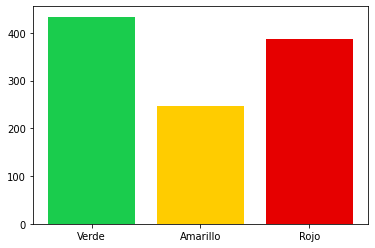

In [ ]:
y = pd.DataFrame(df['SEMAFORO'])

y_green_C = y.loc[y['SEMAFORO'] == 'Verde'].count()[0]
y_yellow_C = y.loc[y['SEMAFORO'] == 'Amarillo'].count()[0]
y_red_C = y.loc[y['SEMAFORO'] == 'Rojo'].count()[0]

y_count = y_green_C, y_yellow_C, y_red_C
y_label = 'Verde', 'Amarillo', 'Rojo'
y_color = (.1,.8,.3), (1,.8,0), (.9,0,0)

plt.bar(y_label, height=y_count, color=y_color, label=(1,2,3))

Con el gráfico de barras que generamos, podemos observar que tenemos una mayoría de registros de agua clasificados en el semáforo con color verde, sin embargo, el color rojo le sigue de cerca. A continuación, revisamos si tenemos valores atípicos.

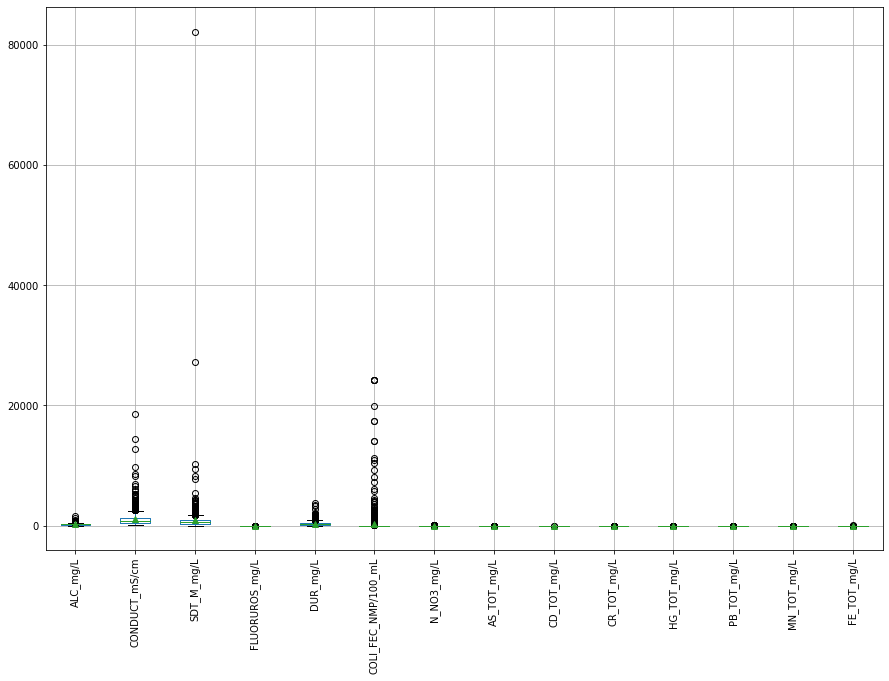

In [ ]:
outliers = df1.boxplot(figsize = (15,10),showmeans = True)
outliers.plot()
plt.xticks(rotation=90)
plt.show()

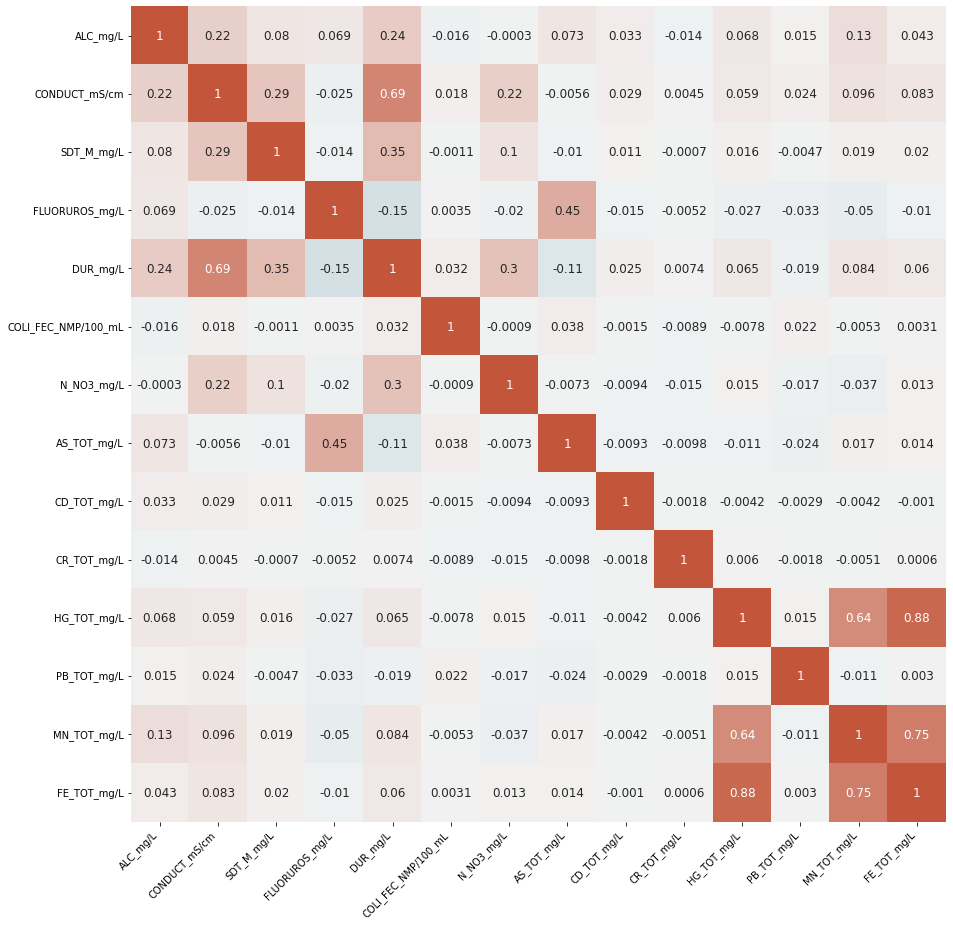

In [ ]:
#Gráfica de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

mi_correlacion = df1.corr().round(decimals=4)

sns.heatmap(
    mi_correlacion,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 12},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(220, 20, as_cmap=True),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

### **Agrupación**

Realizar análisis para encontrar si existe una relación entre la calidad del agua y su ubicación geográfica a través de K-means. Mostrar resultados de agrupamiento de latitudes y longitudes con K means en el mapa de México.<br><br>Para realizar este análisis, debemos primero separar las variables que nos presentan información de ubicación geográfica, en esta caso longitud y latitud, y encontrar su relación con la variable dependiente que nos entrega de forma resumida el estatus de la calidad del agua para cada registro.

In [ ]:
df_coord = df[['LONGITUD','LATITUD','SEMAFORO']]
df_coord

,LONGITUD,LATITUD,SEMAFORO
0,-102.02210,22.20887,Verde
1,-102.20075,21.99958,Verde
2,-102.28801,22.36685,Rojo
3,-102.29449,22.18435,Verde
4,-110.24480,23.45138,Rojo
...,...,...,...
1063,-99.54191,24.76036,Rojo
1064,-99.70099,24.78280,Rojo
1065,-99.82249,25.55197,Rojo
1066,-100.32683,24.80118,Verde


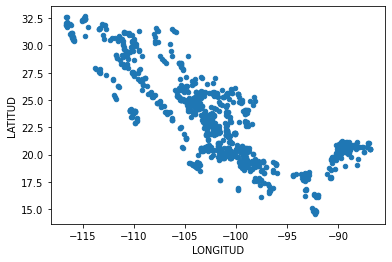

In [ ]:
#Graficamos coordenadas del dataframe
df_coord.plot.scatter('LONGITUD','LATITUD')

In [ ]:
#Agregamos columna para las coordenadas para agregarla al mapa
df_coord
df_coord["geometry"] = list(zip(df_coord.LONGITUD, df_coord.LATITUD))
df_coord["geometry"] = df_coord["geometry"].apply(Point)
df_coord.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LONGITUD,LATITUD,SEMAFORO,geometry
0,-102.02210,22.20887,Verde,POINT (-102.0221 22.20887)
1,-102.20075,21.99958,Verde,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,Rojo,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,Verde,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,Rojo,POINT (-110.2448 23.45138)


,LONGITUD,LATITUD,SEMAFORO,geometry
0,-102.02210,22.20887,Verde,POINT (-102.02210 22.20887)
1,-102.20075,21.99958,Verde,POINT (-102.20075 21.99958)
2,-102.28801,22.36685,Rojo,POINT (-102.28801 22.36685)
3,-102.29449,22.18435,Verde,POINT (-102.29449 22.18435)
4,-110.24480,23.45138,Rojo,POINT (-110.24480 23.45138)
...,...,...,...,...
1063,-99.54191,24.76036,Rojo,POINT (-99.54191 24.76036)
1064,-99.70099,24.78280,Rojo,POINT (-99.70099 24.78280)
1065,-99.82249,25.55197,Rojo,POINT (-99.82249 25.55197)
1066,-100.32683,24.80118,Verde,POINT (-100.32683 24.80118)


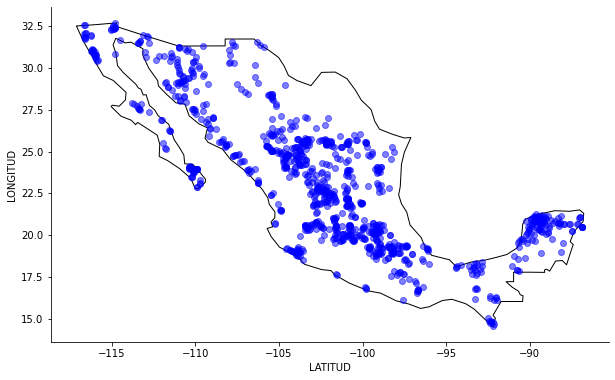

In [ ]:
#Utilizamos el GeoDataFrame

puntos_en_mapa = gpd.GeoDataFrame(df_coord, geometry="geometry")
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")
world.name.unique()
fig, gax = plt.subplots(figsize=(10,10))

#Filtramos solo México
world.query("name == 'Mexico'").plot(ax=gax, edgecolor='black',color='white')
gax.set_xlabel('LATITUD')
gax.set_ylabel('LONGITUD')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

#Graficamos las coordenadas
puntos_en_mapa.plot(ax=gax, color='blue', alpha = 0.5)
puntos_en_mapa

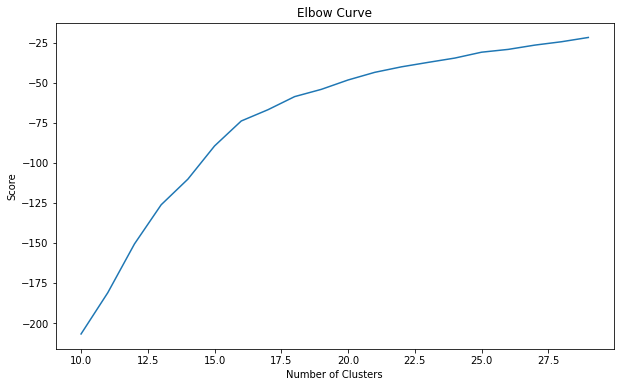

In [ ]:
from sklearn.cluster import KMeans

#Aplicamos Kmeans

numero_de_closters = range(10,30) 
mi_kmeans = [KMeans(n_clusters=i) for i in numero_de_closters]
Y_axis = df_coord[['LATITUD']]
X_axis = df_coord[['LONGITUD']]
calulo_kmeans = [mi_kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(mi_kmeans))]

#Visualizamos los codos
plt.figure(figsize=(10,6))
plt.plot(numero_de_closters, calulo_kmeans)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


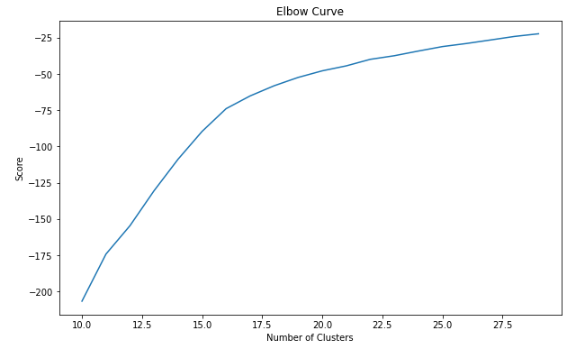

In [ ]:
X = df_coord[['LONGITUD', 'LATITUD']]
#Ajustamos el número de clusters a 25 
kmeans = KMeans(n_clusters=25).fit(X)

#Obtenemos los centroides
centroids = kmeans.cluster_centers_ 
labels = kmeans.predict(X) 
centroides = kmeans.cluster_centers_ 

#Pasamos los centroides a un dataframe
centroides_df = pd.DataFrame(centroides) 
#Asignamos nombres a las columnas de los centroides, convertimos las coordenadas a tipo punto
centroides_df.rename(mapper={0:'LONGITUD', 1: 'LATITUD'}, axis=1, inplace=True) 
centroides_df["geometry"] = list(zip(centroides_df['LONGITUD'], centroides_df['LATITUD']))             
centroides_df["geometry"] = centroides_df["geometry"].apply(Point)                     
puntos_centroides = gpd.GeoDataFrame(centroides_df, geometry="geometry")
centroides_df

,LONGITUD,LATITUD,geometry
0,-99.436303,20.096215,POINT (-99.43630 20.09621)
1,-105.033538,24.759595,POINT (-105.03354 24.75960)
2,-90.420095,19.113129,POINT (-90.42010 19.11313)
3,-114.052573,31.897955,POINT (-114.05257 31.89795)
4,-109.994123,27.281051,POINT (-109.99412 27.28105)
5,-102.531149,22.656710,POINT (-102.53115 22.65671)
6,-101.456452,25.387313,POINT (-101.45645 25.38731)
7,-97.017586,17.896362,POINT (-97.01759 17.89636)
8,-110.244763,23.908398,POINT (-110.24476 23.90840)
9,-103.626164,25.373742,POINT (-103.62616 25.37374)


In [ ]:
#Valores de semáforo
df_coord['SEMAFORO'].value_counts()


Verde       434
Rojo        387
Amarillo    247
Name: SEMAFORO, dtype: int64

In [ ]:
print(y.head())
print(df_coord.head())

  SEMAFORO
0    Verde
1    Verde
2     Rojo
3    Verde
4     Rojo
    LONGITUD   LATITUD SEMAFORO                     geometry
0 -102.02210  22.20887    Verde  POINT (-102.02210 22.20887)
1 -102.20075  21.99958    Verde  POINT (-102.20075 21.99958)
2 -102.28801  22.36685     Rojo  POINT (-102.28801 22.36685)
3 -102.29449  22.18435    Verde  POINT (-102.29449 22.18435)
4 -110.24480  23.45138     Rojo  POINT (-110.24480 23.45138)


In [ ]:
y['TRAFFIC_LIGHTS'] = y['SEMAFORO'].replace(to_replace = "Verde", value = "green")
y['TRAFFIC_LIGHTS'].replace(to_replace = "Rojo", value = "red", inplace=True)
y['TRAFFIC_LIGHTS'].replace(to_replace = "Amarillo", value = "yellow", inplace=True)
y

,SEMAFORO,TRAFFIC_LIGHTS
0,Verde,green
1,Verde,green
2,Rojo,red
3,Verde,green
4,Rojo,red
...,...,...
1063,Rojo,red
1064,Rojo,red
1065,Rojo,red
1066,Verde,green


### **Visualización**

In [ ]:
puntos_en_mapa['LATITUDYLONGITUD'] = puntos_en_mapa['LATITUD'] + puntos_en_mapa['LONGITUD']
diccionario_semaforo = dict(zip(puntos_en_mapa.LATITUDYLONGITUD, y.TRAFFIC_LIGHTS))
diccionario_semaforo

import folium
lat = puntos_en_mapa.iloc[0]['LATITUD']
lng = puntos_en_mapa.iloc[0]['LONGITUD']
map = folium.Map(location=[lng, lat], zoom_start=.5)
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row["LATITUD"], row["LONGITUD"]],
        radius=3, 
        weight=0, 
        fill=True, 
        fill_color=diccionario_semaforo[row["LATITUDYLONGITUD"]],
        color=diccionario_semaforo[row["LATITUDYLONGITUD"]]
    ).add_to(map)
color='black'
for _, row in puntos_en_mapa.iterrows():
    folium.CircleMarker(
        location=[row[1], row[0]],
        radius=3, 
        weight=0, 
        fill=True, 
        fill_color=color,
        color=color
    ).add_to(map)
map



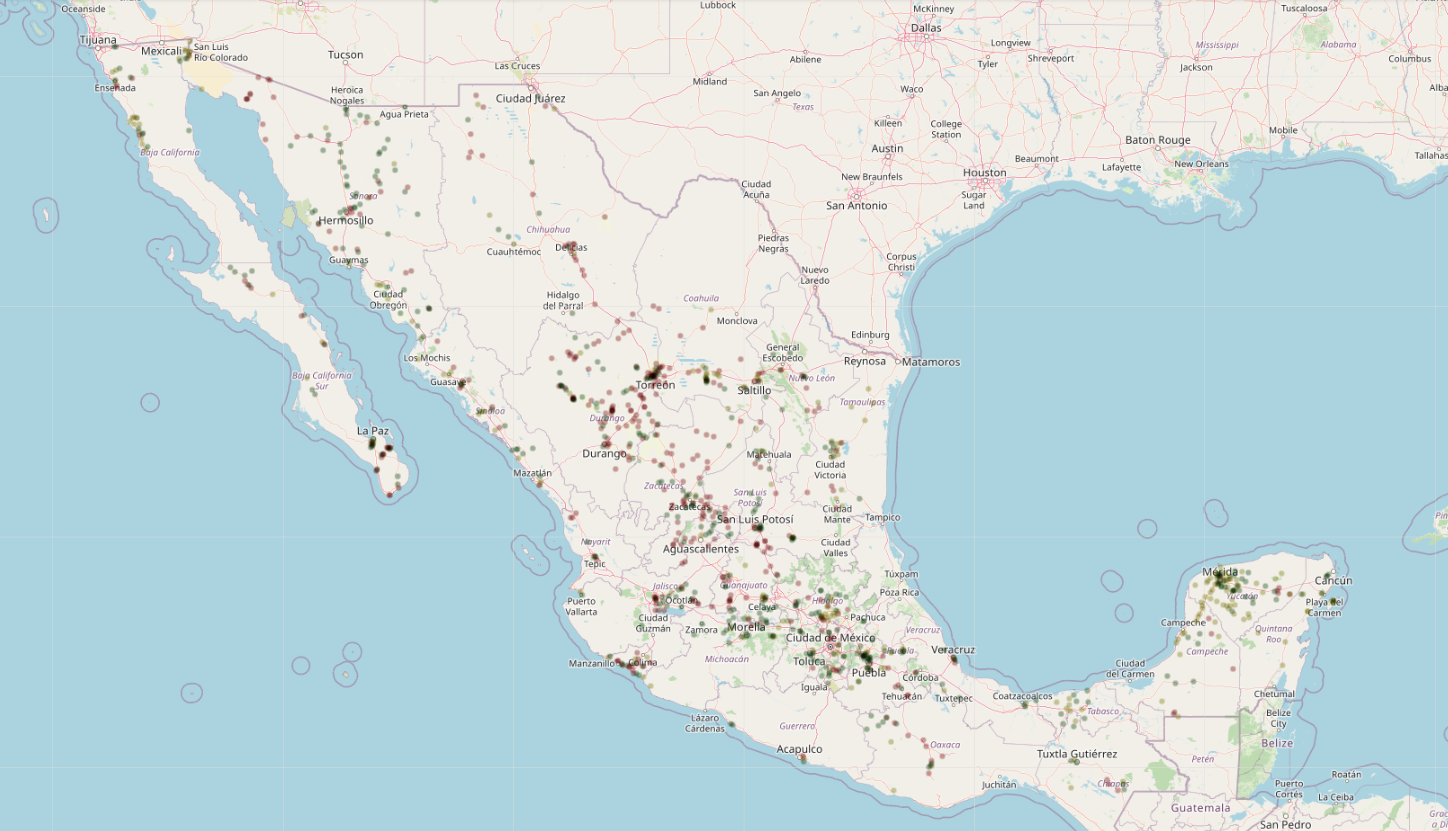

In [ ]:
geo_df = puntos_en_mapa
geo_df['CLUSTER'] = labels
geo_df['CLUSTER'].unique()

array([ 5,  8,  4, 23,  2, 15, 24, 10,  9,  6, 12,  1,  0, 19, 20, 11,  7,
       14, 13, 22, 17, 18,  3, 16, 21], dtype=int32)

In [ ]:
geo_df

,LONGITUD,LATITUD,SEMAFORO,geometry,LATITUDYLONGITUD,CLUSTER
0,-102.02210,22.20887,Verde,POINT (-102.02210 22.20887),-79.81323,5
1,-102.20075,21.99958,Verde,POINT (-102.20075 21.99958),-80.20117,5
2,-102.28801,22.36685,Rojo,POINT (-102.28801 22.36685),-79.92116,5
3,-102.29449,22.18435,Verde,POINT (-102.29449 22.18435),-80.11014,5
4,-110.24480,23.45138,Rojo,POINT (-110.24480 23.45138),-86.79342,8
...,...,...,...,...,...,...
1063,-99.54191,24.76036,Rojo,POINT (-99.54191 24.76036),-74.78155,17
1064,-99.70099,24.78280,Rojo,POINT (-99.70099 24.78280),-74.91819,17
1065,-99.82249,25.55197,Rojo,POINT (-99.82249 25.55197),-74.27052,6
1066,-100.32683,24.80118,Verde,POINT (-100.32683 24.80118),-75.52565,6


Con el objetivo de preparar la visualización que existe entre la ubicación geográfica de los registros de agua y la calidad de agua, debemos encontrar una forma de representar la calidad de agua predominante por cada cluster, para ello, utilizamos la moda. Recogemos la moda de los valores existentes en ```SEMAFORO``` para cada uno de los clústers, lo cual nos indicará cuál es el color del semáforo predominante en cada región, y con esto tenemos una primera información sobre qué región del país tiene mejor calidad de agua.<br><br>
No obstante, la moda por sí sola puede ser un poco engañosa debido a que, si la moda de la variable ```SEMAFORO``` en dos clusters nos entrega el mismo valor, podríamos asumir que tienen el mismo nivel de calidad de agua; pero la moda solo nos entrega el valor más frecuenta, mas no nos indica qué nivel de predominancia tiene ese valor. Por ejemplo, si dos clusters tienen 100 registros de agua, y ambos clusters son representados con el color verde, podríamos asumir que ambas regiones tienen agua sumamente limpia; sin embargo, pudiera ser el caso que de 100 registros, 50 tengan agua verde, 10 tengan agua amarilla, y 40 tengan agua roja; entonces, realmente no es una zona con agua tan limpia, al menos no comparando con una zona donde el 90% de los registros de agua sí sean verdes.<br><br>
Para evitar obtener este sesgo en la visualización de la calidad del agua por regiones, además de obtener la moda, también computaremos el porcentaje que el valor de la moda representa del total de registros dentro de la misma región; y este porcentaje lo utilizaremos para visualizar la intensidad del color del semáforo por cada región.

In [ ]:
# Evaluamos el valor de la columna CLUSTER, y lo utilizamos para separar temporalmente todos los registros pertenecientes al mismo cluster
# Recogemos la moda de los valores de la columna SEMAFORO, y después computamos el porcentaje que este valor representa del total de registros del clúster
# Por último, unimos de nuevo todos los DataFrames temporales en un mismo DataFrame, para continuar con la visualización de los datos en un mapa.

# Cluster 0
geo_df0 = geo_df.loc[geo_df['CLUSTER'] == 0] 
geo_df0_mode = geo_df0['SEMAFORO'].mode()[0]
geo_df0.insert(5, 'SEMAFORO_CLUSTER', geo_df0_mode)
geo_df0.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 0]['SEMAFORO'].value_counts(3)[0])

# Cluster 1
geo_df1 = geo_df.loc[geo_df['CLUSTER'] == 1]
geo_df1_mode = geo_df1['SEMAFORO'].mode()[0]
geo_df1.insert(5, 'SEMAFORO_CLUSTER', geo_df1_mode)
geo_df1.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 1]['SEMAFORO'].value_counts(3)[0])

# Cluster 2
geo_df2 = geo_df.loc[geo_df['CLUSTER'] == 2]
geo_df2_mode = geo_df2['SEMAFORO'].mode()[0]
geo_df2.insert(5, 'SEMAFORO_CLUSTER', geo_df2_mode)
geo_df2.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 2]['SEMAFORO'].value_counts(3)[0])

# Cluster 3
geo_df3 = geo_df.loc[geo_df['CLUSTER'] == 3]
geo_df3_mode = geo_df3['SEMAFORO'].mode()[0]
geo_df3.insert(5, 'SEMAFORO_CLUSTER', geo_df3_mode)
geo_df3.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 3]['SEMAFORO'].value_counts(3)[0])

# Cluster 4
geo_df4 = geo_df.loc[geo_df['CLUSTER'] == 4]
geo_df4_mode = geo_df4['SEMAFORO'].mode()[0]
geo_df4.insert(5, 'SEMAFORO_CLUSTER', geo_df4_mode)
geo_df4.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 4]['SEMAFORO'].value_counts(3)[0])

# Cluster 5
geo_df5 = geo_df.loc[geo_df['CLUSTER'] == 5]
geo_df5_mode = geo_df5['SEMAFORO'].mode()[0]
geo_df5.insert(5, 'SEMAFORO_CLUSTER', geo_df5_mode)
geo_df5.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 5]['SEMAFORO'].value_counts(3)[0])

# Cluster 6
geo_df6 = geo_df.loc[geo_df['CLUSTER'] == 6]
geo_df6_mode = geo_df6['SEMAFORO'].mode()[0]
geo_df6.insert(5, 'SEMAFORO_CLUSTER', geo_df6_mode)
geo_df6.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 6]['SEMAFORO'].value_counts(3)[0])

# Cluster 7
geo_df7 = geo_df.loc[geo_df['CLUSTER'] == 7]
geo_df7_mode = geo_df7['SEMAFORO'].mode()[0]
geo_df7.insert(5, 'SEMAFORO_CLUSTER', geo_df7_mode)
geo_df7.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 7]['SEMAFORO'].value_counts(3)[0])

# Cluster 8
geo_df8 = geo_df.loc[geo_df['CLUSTER'] == 8]
geo_df8_mode = geo_df8['SEMAFORO'].mode()[0]
geo_df8.insert(5, 'SEMAFORO_CLUSTER', geo_df8_mode)
geo_df8.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 8]['SEMAFORO'].value_counts(3)[0])

# Cluster 9
geo_df9 = geo_df.loc[geo_df['CLUSTER'] == 9]
geo_df9_mode = geo_df9['SEMAFORO'].mode()[0]
geo_df9.insert(5, 'SEMAFORO_CLUSTER', geo_df9_mode)
geo_df9.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 9]['SEMAFORO'].value_counts(3)[0])

# Cluster 10
geo_df10 = geo_df.loc[geo_df['CLUSTER'] == 10]
geo_df10_mode = geo_df10['SEMAFORO'].mode()[0]
geo_df10.insert(5, 'SEMAFORO_CLUSTER', geo_df10_mode)
geo_df10.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 10]['SEMAFORO'].value_counts(3)[0])

# Cluster 11
geo_df11 = geo_df.loc[geo_df['CLUSTER'] == 11]
geo_df11_mode = geo_df11['SEMAFORO'].mode()[0]
geo_df11.insert(5, 'SEMAFORO_CLUSTER', geo_df11_mode)
geo_df11.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 11]['SEMAFORO'].value_counts(3)[0])

# Cluster 12
geo_df12 = geo_df.loc[geo_df['CLUSTER'] == 12]
geo_df12_mode = geo_df12['SEMAFORO'].mode()[0]
geo_df12.insert(5, 'SEMAFORO_CLUSTER', geo_df12_mode)
geo_df12.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 12]['SEMAFORO'].value_counts(3)[0])

# Cluster 13
geo_df13 = geo_df.loc[geo_df['CLUSTER'] == 13]
geo_df13_mode = geo_df13['SEMAFORO'].mode()[0]
geo_df13.insert(5, 'SEMAFORO_CLUSTER', geo_df13_mode)
geo_df13.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 13]['SEMAFORO'].value_counts(3)[0])

# Cluster 14
geo_df14 = geo_df.loc[geo_df['CLUSTER'] == 14]
geo_df14_mode = geo_df14['SEMAFORO'].mode()[0]
geo_df14.insert(5, 'SEMAFORO_CLUSTER', geo_df14_mode)
geo_df14.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 14]['SEMAFORO'].value_counts(3)[0])

# Cluster 15
geo_df15 = geo_df.loc[geo_df['CLUSTER'] == 15]
geo_df15_mode = geo_df15['SEMAFORO'].mode()[0]
geo_df15.insert(5, 'SEMAFORO_CLUSTER', geo_df15_mode)
geo_df15.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 15]['SEMAFORO'].value_counts(3)[0])

# Cluster 16
geo_df16 = geo_df.loc[geo_df['CLUSTER'] == 16]
geo_df16_mode = geo_df16['SEMAFORO'].mode()[0]
geo_df16.insert(5, 'SEMAFORO_CLUSTER', geo_df16_mode)
geo_df16.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 16]['SEMAFORO'].value_counts(3)[0])

# Cluster 17
geo_df17 = geo_df.loc[geo_df['CLUSTER'] == 17]
geo_df17_mode = geo_df17['SEMAFORO'].mode()[0]
geo_df17.insert(5, 'SEMAFORO_CLUSTER', geo_df17_mode)
geo_df17.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 17]['SEMAFORO'].value_counts(3)[0])

# Cluster 18
geo_df18 = geo_df.loc[geo_df['CLUSTER'] == 18]
geo_df18_mode = geo_df18['SEMAFORO'].mode()[0]
geo_df18.insert(5, 'SEMAFORO_CLUSTER', geo_df18_mode)
geo_df18.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 18]['SEMAFORO'].value_counts(3)[0])

# Cluster 19
geo_df19 = geo_df.loc[geo_df['CLUSTER'] == 19]
geo_df19_mode = geo_df19['SEMAFORO'].mode()[0]
geo_df19.insert(5, 'SEMAFORO_CLUSTER', geo_df19_mode)
geo_df19.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 19]['SEMAFORO'].value_counts(3)[0])

# Cluster 20
geo_df20 = geo_df.loc[geo_df['CLUSTER'] == 20]
geo_df20_mode = geo_df20['SEMAFORO'].mode()[0]
geo_df20.insert(5, 'SEMAFORO_CLUSTER', geo_df20_mode)
geo_df20.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 20]['SEMAFORO'].value_counts(3)[0])

# Cluster 21
geo_df21 = geo_df.loc[geo_df['CLUSTER'] == 21]
geo_df21_mode = geo_df21['SEMAFORO'].mode()[0]
geo_df21.insert(5, 'SEMAFORO_CLUSTER', geo_df21_mode)
geo_df21.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 21]['SEMAFORO'].value_counts(3)[0])

# Cluster 22
geo_df22 = geo_df.loc[geo_df['CLUSTER'] == 22]
geo_df22_mode = geo_df22['SEMAFORO'].mode()[0]
geo_df22.insert(5, 'SEMAFORO_CLUSTER', geo_df22_mode)
geo_df22.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 22]['SEMAFORO'].value_counts(3)[0])

# Cluster 23
geo_df23 = geo_df.loc[geo_df['CLUSTER'] == 23]
geo_df23_mode = geo_df23['SEMAFORO'].mode()[0]
geo_df23.insert(5, 'SEMAFORO_CLUSTER', geo_df23_mode)
geo_df23.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 23]['SEMAFORO'].value_counts(3)[0])

# Cluster 24
geo_df24 = geo_df.loc[geo_df['CLUSTER'] == 24]
geo_df24_mode = geo_df24['SEMAFORO'].mode()[0]
geo_df24.insert(5, 'SEMAFORO_CLUSTER', geo_df24_mode)
geo_df24.insert(6, 'SEMAFORO_CLUSTER_%', geo_df.loc[geo_df['CLUSTER'] == 24]['SEMAFORO'].value_counts(3)[0])

concat_geo_df = [geo_df0, geo_df1, geo_df2, geo_df3, geo_df4, geo_df5, geo_df6, geo_df7, geo_df8, geo_df9, geo_df10, geo_df11, geo_df12, geo_df13, geo_df14, geo_df15, geo_df16, geo_df17, geo_df18, geo_df19, geo_df20, geo_df21, geo_df22, geo_df23, geo_df24]

geo_df_SxC = pd.concat(concat_geo_df)
geo_df_SxC

,LONGITUD,LATITUD,SEMAFORO,geometry,LATITUDYLONGITUD,SEMAFORO_CLUSTER,SEMAFORO_CLUSTER_%,CLUSTER
270,-99.636214,19.265198,Verde,POINT (-99.63621 19.26520),-80.371016,Verde,0.483333,0
271,-99.565228,19.309457,Verde,POINT (-99.56523 19.30946),-80.255771,Verde,0.483333,0
272,-100.055556,19.853333,Verde,POINT (-100.05556 19.85333),-80.202223,Verde,0.483333,0
273,-99.733256,19.290975,Verde,POINT (-99.73326 19.29097),-80.442281,Verde,0.483333,0
274,-99.897110,19.807640,Verde,POINT (-99.89711 19.80764),-80.089470,Verde,0.483333,0
...,...,...,...,...,...,...,...,...
100,-107.936870,30.747470,Rojo,POINT (-107.93687 30.74747),-77.189400,Rojo,0.583333,24
101,-108.003370,31.054370,Verde,POINT (-108.00337 31.05437),-76.949000,Rojo,0.583333,24
102,-107.763910,31.376590,Amarillo,POINT (-107.76391 31.37659),-76.387320,Rojo,0.583333,24
103,-107.792950,31.557640,Rojo,POINT (-107.79295 31.55764),-76.235310,Rojo,0.583333,24


Ya que tenemos mappeado el valor del semáforo para cada cluster, y computado el porcentaje que de representativdad del valor del semáforo para el cluster completo, continuar con la configuración de los datos geográficos para visualizarlos en un mapa, para ello, utilizaremos la librería KeplerGL, la cual desplega un widget con un mapa que nos permite interactuar con los datos. 🗺

In [ ]:
# Cada que generamos el mapa de KeplerGL, debemos volver a correr este query para reconvertir la columna 'geometry' en datos geométricos (al parecer es un bug).

# Realizamos la conversión para los registros de agua
geo_df_SxC['geometry'] = geo_df_SxC['geometry'].apply(Point)
geo_df_SxC = gpd.GeoDataFrame(geo_df_SxC, geometry='geometry')
print(geo_df_SxC.dtypes)

# Realizamos la conversión para los centroides de los clusters
centroides_df['geometry'] = list(zip(puntos_centroides.iloc[:,0], puntos_centroides.iloc[:,1]))
centroides_df['geometry'] = centroides_df['geometry'].apply(Point)
centroides_df = gpd.GeoDataFrame(centroides_df, geometry='geometry')
print(centroides_df.dtypes)

LONGITUD               float64
LATITUD                float64
SEMAFORO                object
geometry              geometry
LATITUDYLONGITUD       float64
SEMAFORO_CLUSTER        object
SEMAFORO_CLUSTER_%     float64
CLUSTER                  int32
dtype: object
LONGITUD     float64
LATITUD      float64
geometry    geometry
dtype: object


In [ ]:
# Creamos la configuración que utilizará KeplerGL para presentar el mapa y visualizar los registros del agua en el mapa.
map_1config = {'version': 'v1',
 'config': {'visState': {'filters': [],
   'layers': [{'id': '103s6ke',
     'type': 'icon',
     'config': {'dataId': 'Centroides',
      'label': 'Centroides',
      'color': [25, 20, 16],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'LATITUD',
       'lng': 'LONGITUD',
       'icon': 'geometry',
       'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 17,
       'fixedRadius': False,
       'opacity': 1,
       'colorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [0, 50]},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [255, 255, 255],
        'size': 18,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': None,
      'colorScale': 'quantile',
      'sizeField': None,
      'sizeScale': 'linear'}},
    {'id': 'cbcssjb',
     'type': 'point',
     'config': {'dataId': 'Registros de Agua',
      'label': 'Registros de Agua',
      'color': [18, 147, 154],
      'highlightColor': [252, 242, 26, 255],
      'columns': {'lat': 'LATITUD', 'lng': 'LONGITUD', 'altitude': None},
      'isVisible': True,
      'visConfig': {'radius': 15.5,
       'fixedRadius': False,
       'opacity': 0.11,
       'outline': False,
       'thickness': 0.5,
       'strokeColor': None,
       'colorRange': {'name': 'Custom Palette',
        'type': 'custom',
        'category': 'Custom',
        'colors': ['#4daf4a', '#e41a1c', '#ffff33']},
       'strokeColorRange': {'name': 'Global Warming',
        'type': 'sequential',
        'category': 'Uber',
        'colors': ['#5A1846',
         '#900C3F',
         '#C70039',
         '#E3611C',
         '#F1920E',
         '#FFC300']},
       'radiusRange': [15, 29.9],
       'filled': True},
      'hidden': False,
      'textLabel': [{'field': None,
        'color': [25, 20, 16],
        'size': 1,
        'offset': [0, 0],
        'anchor': 'start',
        'alignment': 'center'}]},
     'visualChannels': {'colorField': {'name': 'SEMAFORO_CLUSTER',
       'type': 'string'},
      'colorScale': 'ordinal',
      'strokeColorField': None,
      'strokeColorScale': 'quantile',
      'sizeField': {'name': 'SEMAFORO_CLUSTER_%', 'type': 'real'},
      'sizeScale': 'sqrt'}}],
   'interactionConfig': {'tooltip': {'fieldsToShow': {'Registros de Agua': [{'name': 'LONGITUD',
        'format': None},
       {'name': 'LATITUD', 'format': None},
       {'name': 'SEMAFORO', 'format': None},
       {'name': 'CLUSTER', 'format': None}],
      'Centroides': [{'name': 'LONGITUD', 'format': None},
       {'name': 'LATITUD', 'format': None}]},
     'compareMode': False,
     'compareType': 'absolute',
     'enabled': True},
    'brush': {'size': 50, 'enabled': False},
    'geocoder': {'enabled': False},
    'coordinate': {'enabled': False}},
   'layerBlending': 'normal',
   'splitMaps': [],
   'animationConfig': {'currentTime': None, 'speed': 1}},
  'mapState': {'bearing': 0,
   'dragRotate': False,
   'latitude': 24.077017049607544,
   'longitude': -101.39382121650922,
   'pitch': 0,
   'zoom': 4.034630956248659,
   'isSplit': False},
  'mapStyle': {'styleType': 'light',
   'topLayerGroups': {'label': False},
   'visibleLayerGroups': {'label': True,
    'road': False,
    'border': False,
    'building': False,
    'water': True,
    'land': True,
    '3d building': False},
   'threeDBuildingColor': [218.82023004728686,
    223.47597962276103,
    223.47597962276103],
   'mapStyles': {}}}}

In [ ]:
# Utilizamos la librearía KeplerGL para crear un widget que contiene un mapa interactivo para la presentación de los datos geográficos.
from keplergl import KeplerGl
map_1 = KeplerGl(height=600, width=400, config=map_1config)
map_1.add_data(data=geo_df_SxC, name='Registros de Agua')
map_1.add_data(data=centroides_df, name='Centroides')
map_1

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '103s6ke', 'type': …

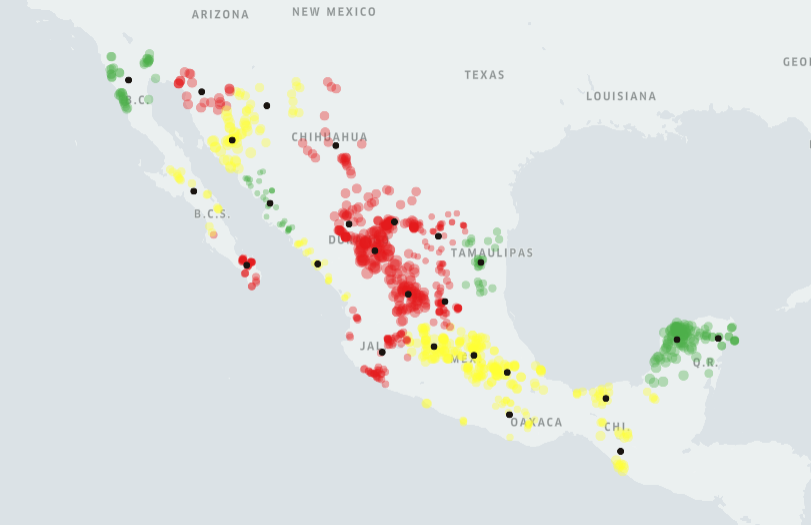

### **Conclusiones**

Realizamos un análisis a los registros de aguas subterránea de México, con datos que nos proporciona la CONAGUA, para determinar si existe una relación entre ubicación geográfica de los acuíferos y su calidad de agua. Para este análisis, tenemos la gran ventaja de que la CONAGUA ya maneja un sistema de semáforo de tres colores (verde, amarillo y rojo) para determinar el nivel de calidad de agua de cada observación de los acuíferos.<br><br>
Ahora, los datos proporcionados por la CONAGUA nos muestra información de manera individual, mas no nos entrega resultados de cómo se encuentra la calidad de agua en diversas regiones del país. Por lo tanto, para poder determinar la relación del agua por regiones del país, debemos agrupar los registros por regiones, y para ello nos hemos apoyado del algorimo K-means. Una vez que contamos con agrupaciones de registros de agua distribuidos a lo largo y ancho del país, revisamos internamente el semáforo de cada uno de los registros por agrupaciones, para asignar un valor de semáforo a nivel macro, por agrupación, lo cual nos da en términos generales la respuesta sobre la relación de una región con la calidad del agua de la misma.<br><br>
Sin embargo, aún con esta determinación del semáforo del agua por cada región, seguimos sin conocer con qué nivel de certeza podemos mencionar si cierta región del país contiene agua limpia o agua contaminada. Es decir, este análisis nos entrega resultados categóricos, pero aún no tenemos entendimiento sobre la escala de limpieza o contaminación a nivel regional. Es por este motivo que recurrimos a computar el porcentaje que representa el valor de la moda del semáforo de una región, en relación al total de registros dentro de la misma región; de esta forma, contamos ya con un nivel de profundidad más para comparar la calidad del agua de las diferentes regiones, incluso entre regiones cuyo valor del semáforo es el mismo.<br><br>
Ya que logramos preparar los datos para obtener la relación de la calidad del agua por regiones, ¿qué observaciones logramos obtener del análisis?
Podemos ver que el centro de Sonora (clúster 2) y el centro del país (clústeres 3, 23 y 7) tienen el agua más limpia del país; sin embargo, Sinaloa (clúster 17), a pesar de ser clasificada como verde en el semáforo de la agrupación, al parecer apenas logra esa clasificación, por lo que, podemos determinar que el agua de sus acuíferos sí es más limpia que la zona Centro-Norte (clústers 1, 5, 11, 13, 14 y 20), en donde predominan los acuíferos clasificados con color rojo en el semáforo, y que la península de Yucatán (clústers 4 y 18) o la zona fronteriza de Baja California (clúster 6), pero, no tan limpia como Sonora y el Centro del país.<br><br>
En un siguiente paso, podríamos comparar estas observaciones con la orografía del país, para entender si existe una relación que expliqué por qué una zona del país tiene mejor calidad de agua que otras. El agua más contaminada de México se encuentra en la Altiplanicia Mexicana; mientras que el agua más limpia del país se encuentra adyacente al Mar de Cortés, ¿existe una relación de causalidad entre la orografía y la calidad del agua?